In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from src import analyze_utils
from typing import Dict
import math

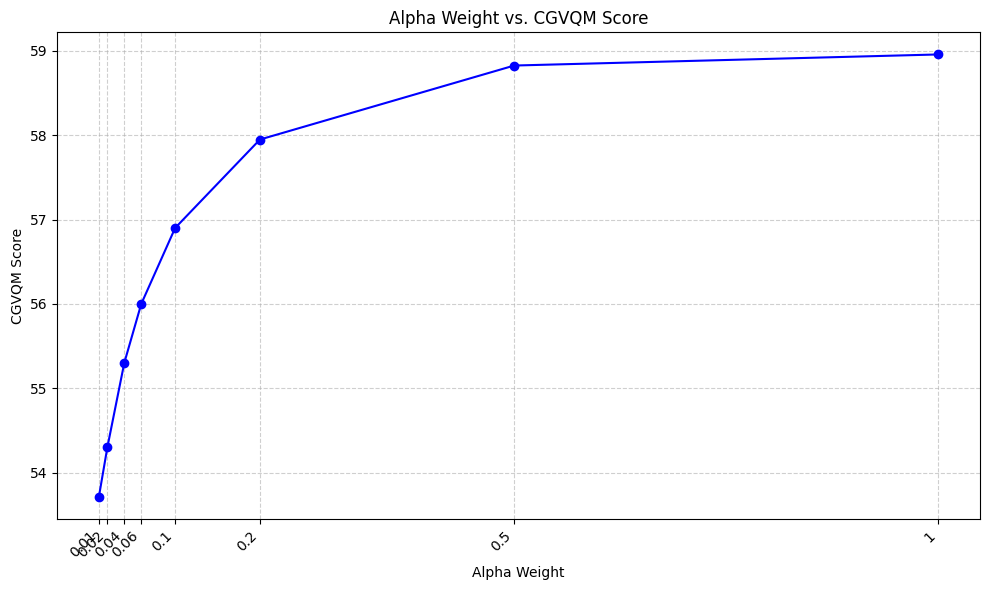

,exp_name,score,num_val
0,vary_alpha_weight_0.01,53.711891,0.01
1,vary_alpha_weight_0.02,54.298481,0.02
2,vary_alpha_weight_0.04,55.300884,0.04
3,vary_alpha_weight_0.06,55.999485,0.06
4,vary_alpha_weight_0.1,56.900173,0.10
5,vary_alpha_weight_0.2,57.948143,0.20
6,vary_alpha_weight_0.5,58.825211,0.50
7,vary_alpha_weight_1.0,58.956535,1.00


In [4]:
score_directory_frames= "outputs/scores_cgvqm_frames/"
score_directory_regular = "outputs/scores_cgvqm"
file_path = 'vary_alpha_weight_scores.json'

full_file_path_frames = os.path.join(score_directory_frames, file_path)
full_file_path_reg = os.path.join(score_directory_regular, file_path)

score_data_dict = analyze_utils.get_dict(full_file_path_reg)

# 3. If data loaded successfully, plot it using the dict-based function
df_results_frames = None # Initialize variable

if score_data_dict is not None:
    # We call the new dictionary-based function, passing the dictionary itself
    df_results_frames = analyze_utils.plot_render_scores_from_dict(
        data_dict=score_data_dict, # <-- The change is passing the dict
        parameter_name="Alpha Weight",
        score_metric="CGVQM Score", # Assuming a default score_metric
        x_evenly_spaced=False
    )

# 4. Display the resulting DataFrame
if df_results_frames is not None:
    display(df_results_frames)

In [5]:
comparison_files_frames = {
    "Alpha Weight": os.path.join(score_directory_frames, 'vary_alpha_weight_scores.json'),
    "Filter Size": os.path.join(score_directory_frames,'vary_filter_size_scores.json'),
    "Hist Percent": os.path.join(score_directory_frames,'vary_hist_percent_scores.json'),
    "Num Samples": os.path.join(score_directory_frames,'vary_num_samples_scores.json'),
}

comparison_files_reg = {
    "Alpha Weight": os.path.join(score_directory_regular, 'vary_alpha_weight_scores.json'),
    "Filter Size": os.path.join(score_directory_regular,'vary_filter_size_scores.json'),
    "Hist Percent": os.path.join(score_directory_regular,'vary_hist_percent_scores.json'),
    "Num Samples": os.path.join(score_directory_regular,'vary_num_samples_scores.json'),
}

✅ Loaded and sorted data for: Alpha Weight
✅ Loaded and sorted data for: Filter Size
✅ Loaded and sorted data for: Hist Percent
✅ Loaded and sorted data for: Num Samples


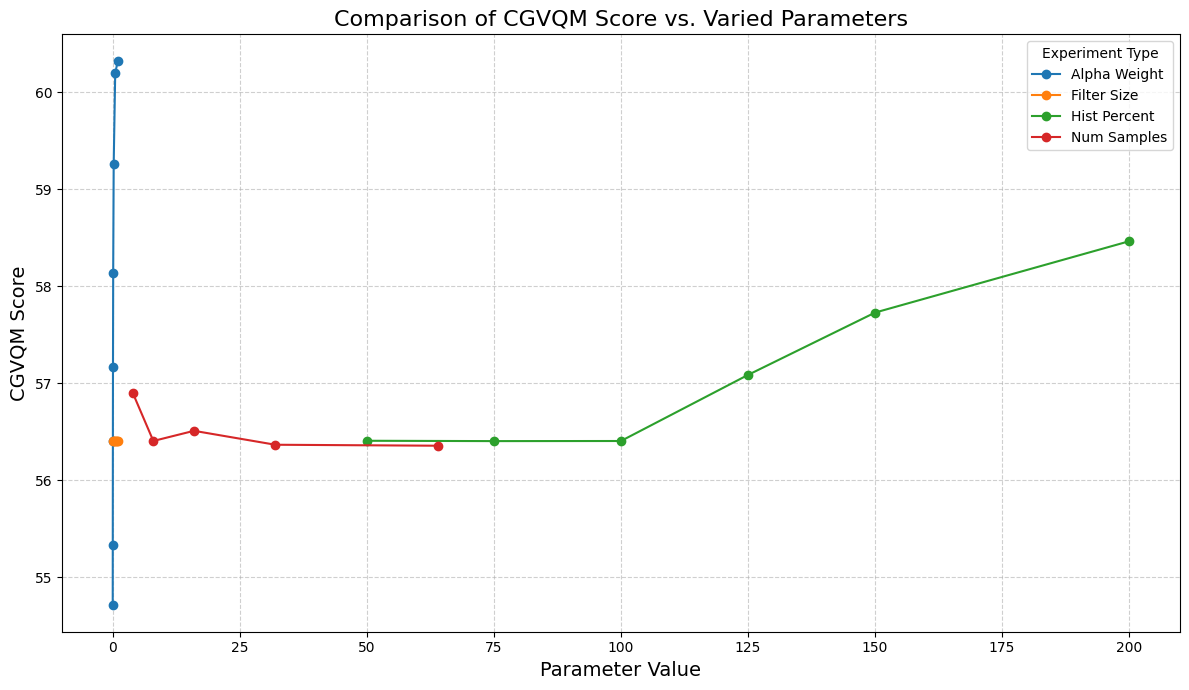

✅ Loaded and sorted data for: Alpha Weight
✅ Loaded and sorted data for: Filter Size
✅ Loaded and sorted data for: Hist Percent
✅ Loaded and sorted data for: Num Samples


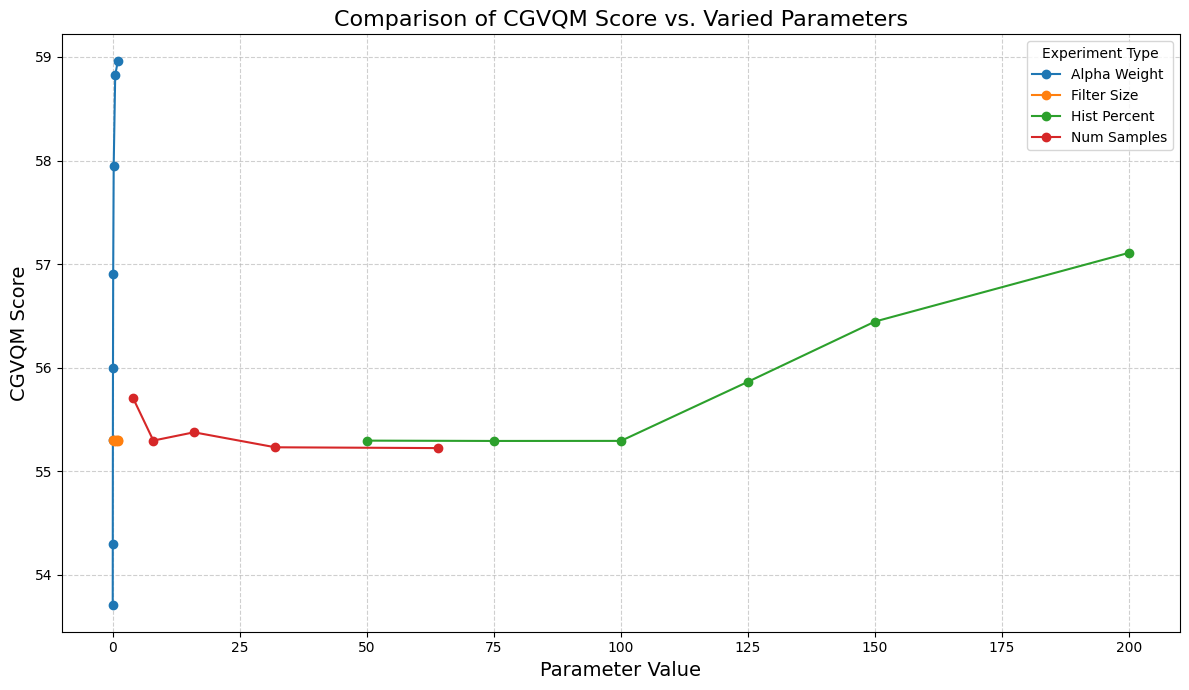

In [6]:
frames_loaded = analyze_utils.load_multiple_experiments(comparison_files_frames)
reg_loaded = analyze_utils.load_multiple_experiments(comparison_files_reg)
frames_data = analyze_utils.compare_render_experiments(frames_loaded)
reg_data = analyze_utils.compare_render_experiments(reg_loaded)

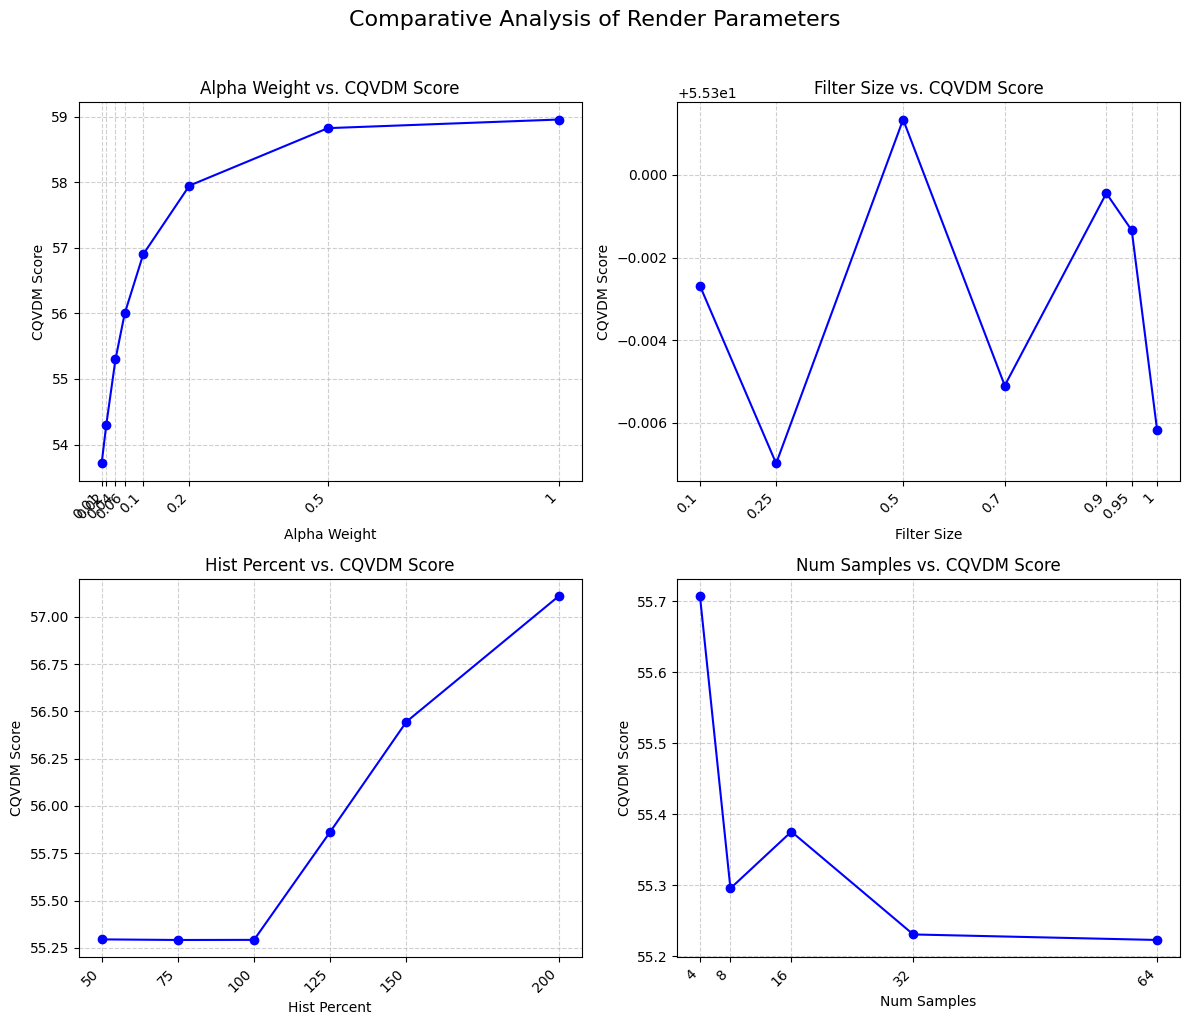

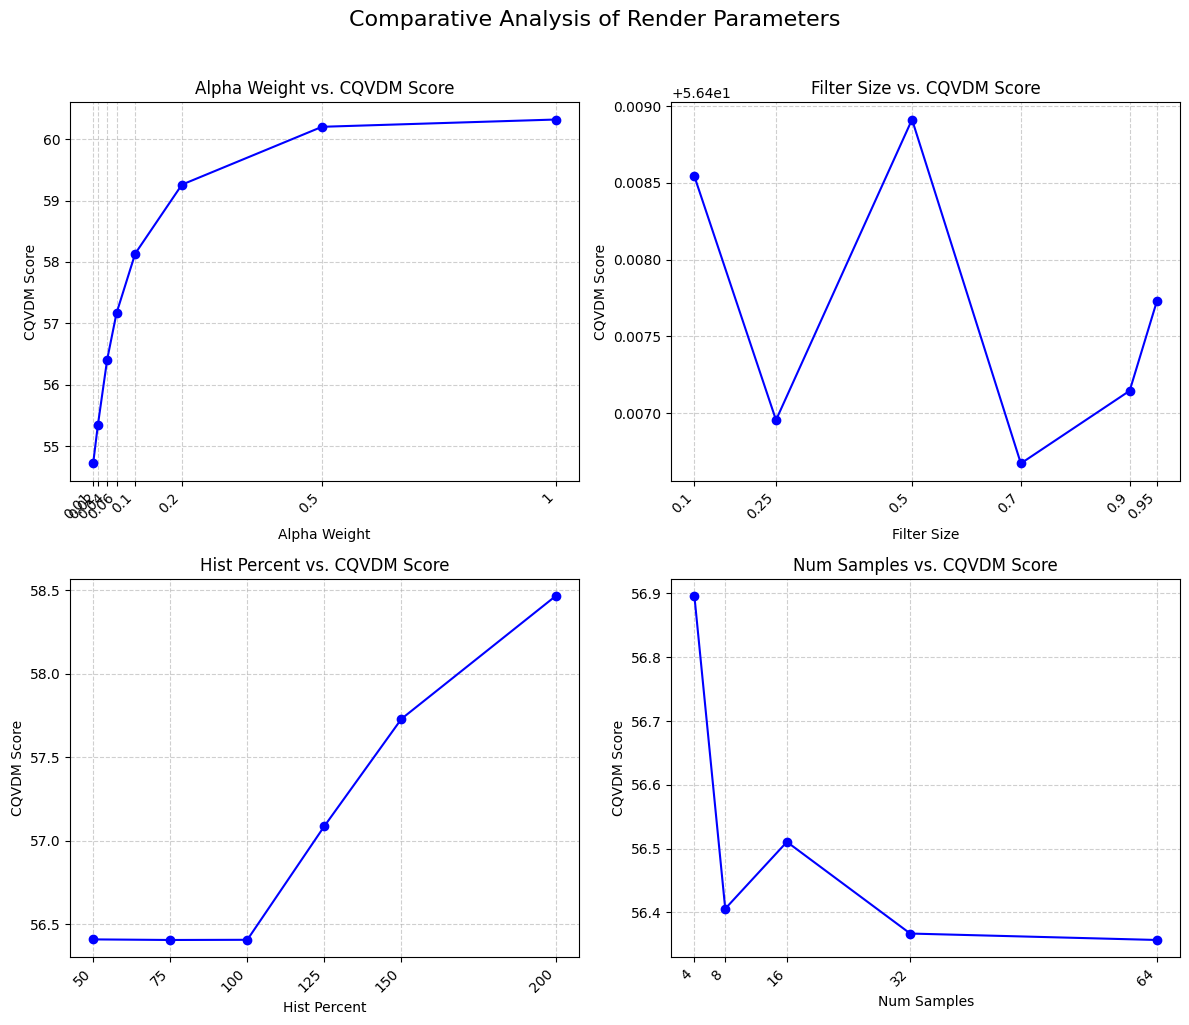

In [6]:
analyze_utils.plot_experiment_grid(reg_loaded, score_metric="CQVDM Score")
analyze_utils.plot_experiment_grid(frames_loaded, score_metric="CQVDM Score")


In [9]:
analyze_utils.summarize_performance_table(frames_data)

,experiment_type,best_score,best_score_value,worst_score,worst_score_value,pearson_correlation
0,Alpha Weight,60.318890,1.0,54.719017,0.01,0.784501
1,Filter Size,56.408913,0.5,56.406673,0.70,-0.350621
2,Hist Percent,58.465443,200.0,56.404503,75.00,0.952373
3,Num Samples,56.895821,4.0,56.356915,64.00,-0.604705


In [8]:
# Calculate basic descriptive statistics for the 'score' column, grouped by experiment type
score_summary = frames_data.groupby('experiment_type')['score'].describe()
display(score_summary)

,count,mean,std,min,25%,50%,75%,max
experiment_type,,,,,,,,
Alpha Weight,8.0,57.693139,2.143036,54.719017,56.141788,57.650322,59.494102,60.318890
Filter Size,6.0,56.407660,0.000904,56.406673,56.407003,56.407438,56.408340,56.408913
Hist Percent,6.0,57.083354,0.860725,56.404503,56.406189,56.747452,57.568992,58.465443
Num Samples,5.0,56.507243,0.225581,56.356915,56.366993,56.405880,56.510609,56.895821


In [9]:
score_summary = reg_data.groupby('experiment_type')['score'].describe()
display(score_summary)

,count,mean,std,min,25%,50%,75%,max
experiment_type,,,,,,,,
Alpha Weight,8.0,56.492600,2.000236,53.711891,55.050283,56.449829,58.167410,58.956535
Filter Size,7.0,55.296945,0.003125,55.293018,55.294361,55.297318,55.299109,55.301342
Hist Percent,6.0,55.882971,0.756851,55.291954,55.293170,55.579348,56.299874,57.109352
Num Samples,5.0,55.366437,0.200172,55.222965,55.230755,55.295635,55.375530,55.707298


In [10]:
analyze_utils.summarize_performance_table(reg_data)

,experiment_type,best_score,best_score_value,worst_score,worst_score_value,pearson_correlation
0,Alpha Weight,58.956535,1.0,53.711891,0.01,0.786127
1,Filter Size,55.301342,0.5,55.293018,0.25,0.101609
2,Hist Percent,57.109352,200.0,55.291954,75.00,0.951392
3,Num Samples,55.707298,4.0,55.222965,64.00,-0.644074


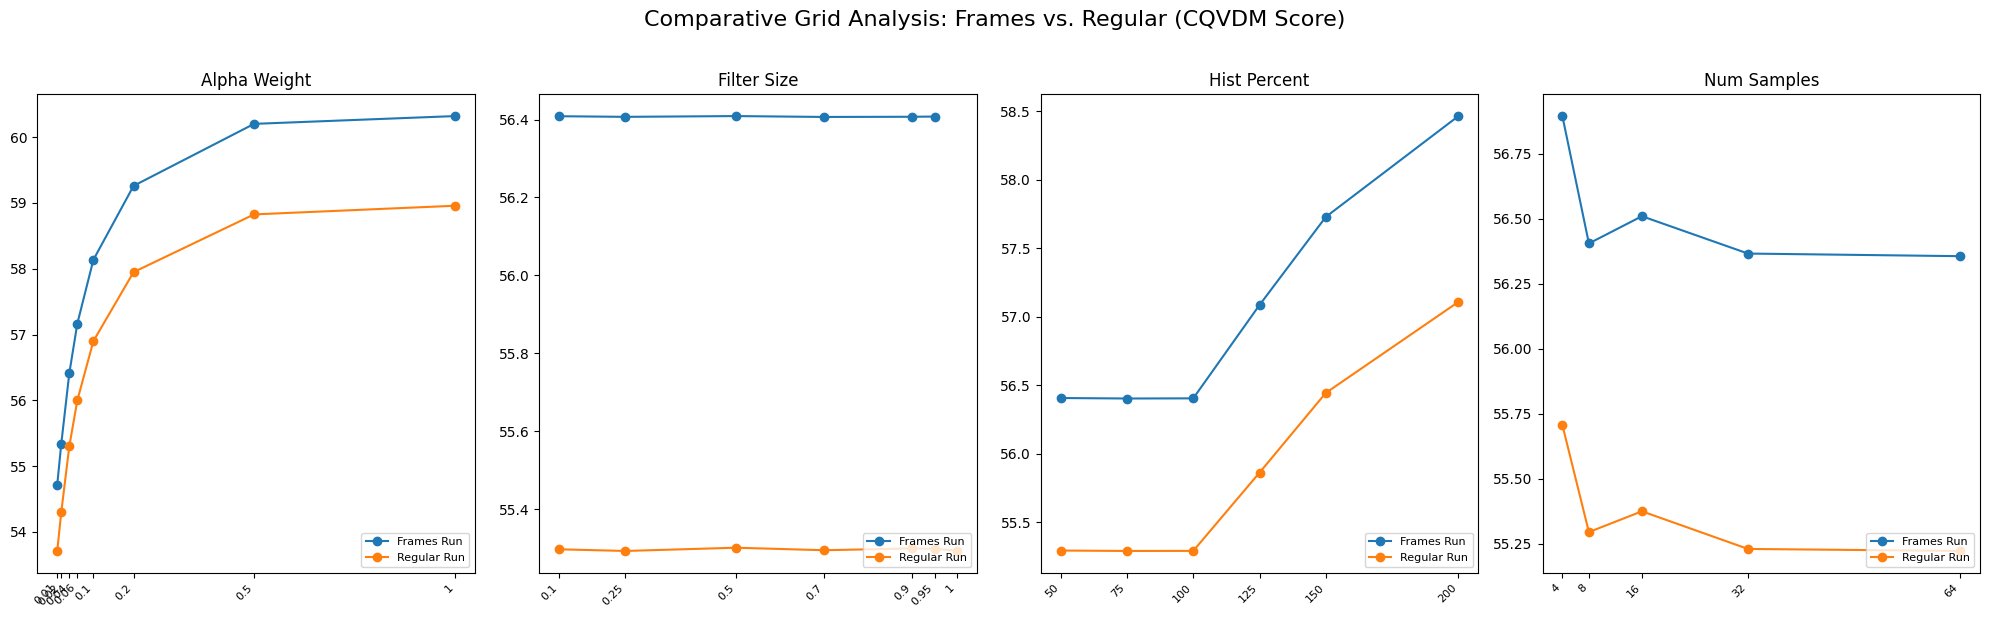

In [7]:
analyze_utils.plot_dual_experiment_grid(
        frames_data=frames_loaded, 
        regular_data=reg_loaded, 
        score_metric="CQVDM Score"
    )